In [ ]:
!pip install tf-pose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 20.4 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
     |████████████████████████████████| 110.5 MB 1.3 kB/s 
     |████████████████████████████████| 296 kB 74.5 MB/s 
     |████████████████████████████████| 20.1 MB 1.4 MB/s 
     |████████████████████████████████| 3.8 MB 58.8 MB/s 
     |████████████████████████████████| 2.9 MB 54.4 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 503 kB 68.3 MB/s 
  Created wheel for tf-pose: filename=tf_pose-0.11.0-cp37-cp37m-linux_x86_64.whl size=7475996 sha256=f99455396d234f86a2491c63381246111c5d3f12d8f07c6beafd0796548eaaa2
  Stored in directory: /root/.cache/pip/wheels/97/f2/ac/3d7780caa44736de0b040ed21deb228bb69523cd2e0d44b18d
  Created wheel for dill: filename=dill-0.2.7.1-py3-n

In [ ]:
import argparse
import logging
import sys
import time

from tf_pose import common
from tqdm import tqdm
import cv2
import os
import pandas as pd
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import matplotlib.pyplot as plt
%matplotlib inline

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




In [ ]:
size = '432x368'
model = 'mobilenet_thin'
w, h = model_wh(size)
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path(model), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path(model), target_size=(w, h))

[2022-07-31 09:08:05,460] [TfPoseEstimator] [INFO] loading graph from /usr/local/lib/python3.7/dist-packages/tf_pose_data/graph/mobilenet_thin/graph_opt.pb(default size=432x368)






TfPoseEstimator/MobilenetV1/Conv2d_0/weights
TfPoseEstimator/image
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_0/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_0/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_0/Relu
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_1_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Conv2D_bn_offset
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/BatchNorm/FusedBatchNorm
TfPoseEstimator/MobilenetV1/Conv2d_1_pointwise/Relu
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise_weights
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/weights
TfPoseEstimator/MobilenetV1/Conv2d_2_depthwise/depthwise
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D
TfPoseEstimator/MobilenetV1/Conv2d_2_pointwise/Conv2D_bn_offset
TfPoseEstimat

In [ ]:
import glob
train_filenames_2 = glob.glob("/content/drive/MyDrive/umpire_gesture_recognition/model2_train/*")
test_filenames_2 = glob.glob("/content/drive/MyDrive/umpire_gesture_recognition/model2_test/*")

In [ ]:
cutShots = []
cutFiles=[]
cutimgnames=[]
pbar = tqdm(total=len(train_filenames_2))
for img in train_filenames_2:
    image = common.read_imgfile(img, None, None)
    humans = e.inference(npimg = image, upsample_size=4.0)
    if len(humans)>0:
        cutShots.append(humans[0])
        cutFiles.append(image)
        cutimgnames.append(img)
    pbar.update(1)
pbar.close()
print("Cut Shot Examples: ",len(cutFiles))

 98%|█████████▊| 312/317 [06:06<00:05,  1.17s/it]

Exception: ignored

In [ ]:
def humanToDict(hum):
    resultDict = {}
    parts = hum.body_parts.keys()
    for p in parts:
        resultDict[str(p)+'_x'] = hum.body_parts[p].x
        resultDict[str(p)+'_y'] = hum.body_parts[p].y
        resultDict[str(p)+'_score'] = hum.body_parts[p].score
    return resultDict

In [ ]:
cutList = []
for sh in cutShots:
    cutList.append(humanToDict(sh))
    
cutdf = pd.DataFrame(cutList)
#standHumadf['img'] = standFiles
cutdf

,0_x,0_y,0_score,1_x,1_y,1_score,2_x,2_y,2_score,3_x,...,9_score,10_x,10_y,10_score,12_x,12_y,12_score,13_x,13_y,13_score
0,0.689815,0.646739,0.381204,0.703704,0.722826,0.654050,0.662037,0.728261,0.527818,0.652778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.500000,0.233696,0.651732,0.500000,0.293478,0.606592,0.379630,0.282609,0.476703,0.282407,...,0.449478,0.412037,0.923913,0.550033,0.611111,0.744565,0.403366,0.657407,0.907609,0.465591
2,0.495370,0.358696,0.755699,0.555556,0.494565,0.630764,0.467593,0.461957,0.532475,0.328704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375000,0.233696,0.835355,0.384259,0.385870,0.654632,0.287037,0.396739,0.573762,0.189815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.620370,0.157609,0.782908,0.625000,0.222826,0.812689,0.560185,0.211957,0.766536,0.509259,...,0.617064,0.541667,0.760870,0.669719,0.675926,0.603261,0.587016,0.703704,0.755435,0.627148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.486111,0.135870,0.912354,0.481481,0.260870,0.702925,0.412037,0.266304,0.744607,0.342593,...,0.414404,NaN,NaN,NaN,0.444444,0.896739,0.529268,NaN,NaN,NaN
298,0.472222,0.233696,0.865453,0.435185,0.353261,0.639073,0.388889,0.364130,0.578831,0.375000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,0.486111,0.130435,0.824180,0.504630,0.217391,0.706793,0.393519,0.211957,0.728249,0.277778,...,0.173580,0.486111,0.880435,0.153376,0.569444,0.701087,0.194190,NaN,NaN,NaN
300,0.523148,0.380435,0.774669,0.578704,0.516304,0.684541,0.500000,0.489130,0.570767,0.398148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cutdf.to_csv('training_new.csv', index=False)

In [ ]:
sign_class=[]
i=0
for img in cutimgnames:
  if img.split("/")[-1].count("no_action")>0:
    sign_class.append(0)
  if img.split("/")[-1].count("no_ball")>0:
    sign_class.append(1)
  if img.split("/")[-1].count("wide")>0:
    sign_class.append(2)
  if img.split("/")[-1].count("sixes")>0:
    sign_class.append(3)
  if img.split("/")[-1].count("out")>0:
    sign_class.append(4)
sign_class = np.array(sign_class)
sign_class

array([1, 3, 2, 1, 4, 4, 3, 0, 1, 1, 0, 4, 2, 2, 0, 3, 2, 4, 0, 3, 1, 1,
       1, 4, 4, 2, 4, 1, 4, 2, 2, 3, 1, 4, 2, 1, 0, 1, 0, 2, 2, 1, 3, 1,
       1, 0, 1, 0, 1, 3, 2, 3, 2, 0, 1, 4, 2, 3, 3, 2, 3, 3, 2, 4, 1, 4,
       1, 4, 0, 4, 4, 2, 1, 1, 2, 3, 4, 3, 3, 0, 1, 2, 0, 2, 2, 4, 1, 0,
       1, 4, 0, 1, 1, 1, 0, 0, 1, 1, 2, 4, 3, 2, 2, 3, 4, 4, 0, 2, 3, 3,
       0, 1, 3, 2, 1, 0, 0, 1, 0, 3, 3, 3, 2, 3, 2, 4, 0, 2, 4, 1, 1, 3,
       4, 1, 2, 3, 2, 3, 2, 2, 3, 4, 2, 2, 0, 4, 1, 1, 4, 3, 4, 0, 0, 0,
       3, 3, 2, 3, 1, 4, 3, 1, 0, 2, 0, 1, 4, 0, 2, 3, 2, 3, 2, 4, 3, 2,
       3, 0, 4, 0, 0, 1, 3, 1, 1, 4, 0, 1, 1, 1, 4, 3, 4, 3, 2, 2, 2, 4,
       4, 3, 2, 4, 4, 4, 0, 4, 0, 0, 1, 0, 3, 1, 1, 3, 3, 2, 4, 2, 3, 3,
       2, 0, 2, 4, 2, 0, 1, 1, 4, 1, 2, 1, 0, 0, 0, 0, 2, 2, 3, 2, 3, 3,
       3, 0, 4, 1, 0, 2, 2, 2, 4, 0, 4, 3, 0, 3, 1, 2, 2, 2, 2, 2, 2, 3,
       4, 1, 1, 4, 1, 3, 0, 0, 2, 1, 0, 0, 2, 4, 3, 2, 0, 3, 2, 4, 4, 2,
       1, 0, 4, 1, 0, 4, 1, 0, 1, 4, 4, 2, 1, 2, 2,

In [ ]:
train_output = pd.DataFrame(sign_class)
train_output.to_csv('training_y_new.csv', index=False)

In [ ]:
cutShots = []
cutFiles=[]
cutimgnames=[]
pbar = tqdm(total=len(test_filenames_2))
for img in test_filenames_2:
    image = common.read_imgfile(img, None, None)
    humans = e.inference(npimg = image, upsample_size=4.0)
    if len(humans)>0:
        cutShots.append(humans[0])
        cutFiles.append(image)
        cutimgnames.append(img)
    pbar.update(1)
pbar.close()
print("Cut Shot Examples: ",len(cutFiles))


 98%|█████████▊| 312/317 [08:08<00:07,  1.56s/it]

100%|██████████| 78/78 [02:27<00:00,  1.89s/it]

Cut Shot Examples:  76


In [ ]:
def humanToDict(hum):
    resultDict = {}
    parts = hum.body_parts.keys()
    for p in parts:
        resultDict[str(p)+'_x'] = hum.body_parts[p].x
        resultDict[str(p)+'_y'] = hum.body_parts[p].y
        resultDict[str(p)+'_score'] = hum.body_parts[p].score
    return resultDict

In [ ]:
cutList = []
for sh in cutShots:
    cutList.append(humanToDict(sh))
    
cutdf = pd.DataFrame(cutList)
#standHumadf['img'] = standFiles
cutdf

,0_x,0_y,0_score,1_x,1_y,1_score,2_x,2_y,2_score,3_x,...,4_score,9_x,9_y,9_score,10_x,10_y,10_score,7_x,7_y,7_score
0,0.680556,0.130435,0.724906,0.699074,0.211957,0.711118,0.578704,0.217391,0.658890,0.578704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.490741,0.260870,0.787461,0.486111,0.315217,0.726004,0.402778,0.309783,0.582277,0.333333,...,0.096345,0.412037,0.711957,0.580689,0.402778,0.885870,0.594374,NaN,NaN,NaN
2,0.685185,0.233696,0.609560,0.717593,0.304348,0.628355,0.592593,0.315217,0.535199,0.564815,...,0.701530,0.671296,0.760870,0.428448,0.657407,0.891304,0.220964,0.740741,0.510870,0.113177
3,0.402778,0.146739,0.708269,0.439815,0.304348,0.699742,0.342593,0.293478,0.634889,0.291667,...,0.117765,NaN,NaN,NaN,NaN,NaN,NaN,0.518519,0.527174,0.452667
4,0.379630,0.228261,0.839831,0.384259,0.380435,0.685377,0.291667,0.396739,0.559793,0.199074,...,0.596388,NaN,NaN,NaN,NaN,NaN,NaN,0.532407,0.798913,0.169444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.453704,0.619565,0.264752,0.416667,0.777174,0.209252,0.300926,0.744565,0.238200,0.240741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,0.560185,0.157609,0.611052,0.574074,0.255435,0.572362,0.435185,0.239130,0.436314,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.671296,0.597826,0.454895
73,0.550926,0.184783,0.693600,0.578704,0.244565,0.760957,0.541667,0.250000,0.623364,0.518519,...,0.275816,0.550926,0.701087,0.148670,0.560185,0.836957,0.098719,0.648148,0.489130,0.499397
74,0.435185,0.217391,0.753115,0.481481,0.391304,0.655957,0.347222,0.402174,0.562552,0.259259,...,0.683708,NaN,NaN,NaN,NaN,NaN,NaN,0.537037,0.701087,0.672421


In [ ]:
cutdf.to_csv('test_new.csv', index=False)

In [ ]:
sign_class=[]
i=0
for img in cutimgnames:
  if img.split("/")[-1].count("no_action")>0:
    sign_class.append(0)
  if img.split("/")[-1].count("no_ball")>0:
    sign_class.append(1)
  if img.split("/")[-1].count("wide")>0:
    sign_class.append(2)
  if img.split("/")[-1].count("sixes")>0:
    sign_class.append(3)
  if img.split("/")[-1].count("out")>0:
    sign_class.append(4)
sign_class = np.array(sign_class)
sign_class

array([0, 3, 0, 4, 1, 3, 4, 2, 4, 0, 0, 0, 0, 2, 4, 1, 0, 3, 4, 1, 0, 4,
       0, 3, 4, 2, 1, 4, 4, 1, 3, 3, 2, 0, 0, 1, 2, 4, 0, 4, 0, 4, 1, 0,
       3, 3, 2, 1, 0, 3, 3, 0, 0, 4, 1, 4, 1, 1, 3, 3, 2, 4, 2, 3, 1, 0,
       0, 1, 4, 4, 1, 3, 0, 0, 0, 3])

In [ ]:
test_y=pd.DataFrame(sign_class)
test_y.to_csv('test_y_new.csv', index=False)

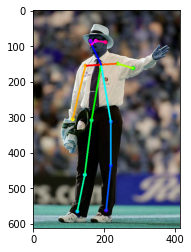

In [ ]:
img='/content/drive/MyDrive/umpire_gesture_recognition/model2_train/no_ball_29.jpg'
image = common.read_imgfile(img, None, None)
humans = e.inference(npimg = image, upsample_size=4.0)
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

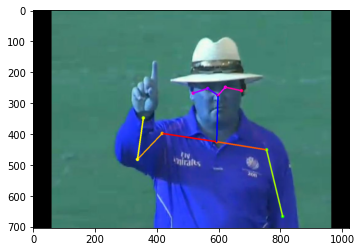

In [ ]:
img='/content/drive/MyDrive/umpire_gesture_recognition/model2_train/out_17.jpg'
image = common.read_imgfile(img, None, None)
humans = e.inference(npimg = image, upsample_size=4.0)
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

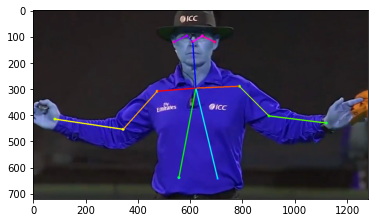

In [ ]:
img='/content/drive/MyDrive/umpire_gesture_recognition/model2_train/wide_53.jpg'
image = common.read_imgfile(img, None, None)
humans = e.inference(npimg = image, upsample_size=4.0)
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
plt.imshow(image)

In [ ]:
#testing area

train_x=pd.read_csv('training_new.csv')
train_y=pd.read_csv('training_y_new.csv')
test_x=pd.read_csv('test_new.csv')
test_y=pd.read_csv('test_y_new.csv')

In [ ]:
train_x = train_x.reindex(sorted(train_x.columns), axis=1)
test_x = test_x.reindex(sorted(test_x.columns), axis=1)

In [ ]:
train_x.isna().sum()

0_score      18
0_x          18
0_y          18
10_score    222
10_x        222
10_y        222
11_score     61
11_x         61
11_y         61
12_score    195
12_x        195
12_y        195
13_score    221
13_x        221
13_y        221
14_score     27
14_x         27
14_y         27
15_score     25
15_x         25
15_y         25
16_score     83
16_x         83
16_y         83
17_score     39
17_x         39
17_y         39
1_score       0
1_x           0
1_y           0
2_score       1
2_x           1
2_y           1
3_score      57
3_x          57
3_y          57
4_score     101
4_x         101
4_y         101
5_score       3
5_x           3
5_y           3
6_score      58
6_x          58
6_y          58
7_score     108
7_x         108
7_y         108
8_score      52
8_x          52
8_y          52
9_score     197
9_x         197
9_y         197
dtype: int64

In [ ]:
test_x.isna().sum()

0_score      3
0_x          3
0_y          3
10_score    51
10_x        51
10_y        51
11_score    18
11_x        18
11_y        18
12_score    44
12_x        44
12_y        44
13_score    53
13_x        53
13_y        53
14_score     5
14_x         5
14_y         5
15_score     6
15_x         6
15_y         6
16_score    19
16_x        19
16_y        19
17_score     9
17_x         9
17_y         9
1_score      0
1_x          0
1_y          0
2_score      3
2_x          3
2_y          3
3_score     16
3_x         16
3_y         16
4_score     23
4_x         23
4_y         23
5_score      3
5_x          3
5_y          3
6_score     17
6_x         17
6_y         17
7_score     29
7_x         29
7_y         29
8_score     17
8_x         17
8_y         17
9_score     45
9_x         45
9_y         45
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = pd.DataFrame(scaler.transform(train_x))

In [ ]:
train_x = train_x.fillna(0)
train_x

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.311646,0.689474,0.867188,0.000000,0.000000,0.000000,0.219290,0.721053,0.976923,0.000000,...,0.888889,0.035408,0.774194,1.000000,0.195343,0.704663,0.976190,0.000000,0.000000,0.000000
1,0.657388,0.473684,0.273437,0.767397,0.480315,0.836735,0.599007,0.578947,0.469231,0.464659,...,0.131944,0.000000,0.000000,0.000000,0.667169,0.404145,0.476190,0.559713,0.377143,0.426471
2,0.790261,0.468421,0.453125,0.000000,0.000000,0.000000,0.347691,0.557895,0.846154,0.000000,...,0.493056,0.673089,0.817204,0.506410,0.461234,0.518135,0.857143,0.000000,0.000000,0.000000
3,0.892063,0.331579,0.273437,0.000000,0.000000,0.000000,0.295545,0.410526,0.815385,0.000000,...,0.569444,0.065534,0.500000,0.814103,0.138068,0.357513,0.809524,0.000000,0.000000,0.000000
4,0.825035,0.610526,0.164062,0.962569,0.700787,0.224490,0.928556,0.636842,0.261538,0.728193,...,0.222222,0.480041,0.688172,0.358974,0.916097,0.590674,0.253968,0.805088,0.525714,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.990471,0.457895,0.132813,0.000000,0.000000,0.000000,0.760132,0.500000,0.469231,0.645326,...,0.229167,0.657794,0.747312,0.288462,0.518696,0.476684,0.460317,0.508358,0.491429,0.911765
298,0.930530,0.442105,0.273437,0.000000,0.000000,0.000000,0.132302,0.442105,0.515385,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
299,0.877782,0.457895,0.125000,0.120569,0.606299,0.673469,0.718466,0.542105,0.346154,0.164496,...,0.131944,0.000000,0.000000,0.000000,0.764315,0.440415,0.349206,0.155748,0.405714,0.323529
300,0.814505,0.500000,0.484375,0.000000,0.000000,0.000000,0.448534,0.605263,0.823077,0.000000,...,0.520833,0.751170,0.854839,0.538462,0.394630,0.564767,0.841270,0.000000,0.000000,0.000000


In [ ]:
test_x = pd.DataFrame(scaler.transform(test_x))

In [ ]:
test_x = test_x.fillna(0)
test_x

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.750907,0.678947,0.125000,0.000000,0.000000,0.000000,0.771181,0.805263,0.369231,0.656760,...,0.243056,0.000000,0.000000,0.000000,0.320108,0.694301,0.396825,0.000000,0.000000,0.000000
1,0.830853,0.463158,0.312500,0.839705,0.464567,0.693878,0.829400,0.547368,0.430769,0.695517,...,0.000000,0.000000,0.000000,0.000000,0.864319,0.445596,0.428571,0.751829,0.354286,0.323529
2,0.603491,0.684211,0.273437,0.230784,0.897638,0.714286,0.613278,0.810526,0.438462,0.499282,...,0.347222,0.041491,0.752688,0.500000,0.595768,0.699482,0.468254,0.528921,0.674286,0.455882
3,0.729644,0.363158,0.148438,0.000000,0.000000,0.000000,0.307477,0.442105,0.830769,0.000000,...,0.451389,0.460240,0.494624,0.519231,0.475908,0.383420,0.785714,0.000000,0.000000,0.000000
4,0.897784,0.336842,0.265625,0.000000,0.000000,0.000000,0.299449,0.405263,0.792308,0.000000,...,0.590278,0.110894,0.510753,0.839744,0.105731,0.352332,0.785714,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.162817,0.421053,0.828125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72,0.605398,0.542105,0.164062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.409722,0.462989,0.672043,0.602564,0.154064,0.466321,0.452381,0.000000,0.000000,0.000000
73,0.710896,0.531579,0.203125,0.031439,0.732283,0.510204,0.897609,0.573684,0.338462,0.130811,...,0.270833,0.517881,0.645161,0.474359,0.714845,0.564767,0.341270,0.119275,0.525714,0.294118
74,0.786959,0.400000,0.250000,0.000000,0.000000,0.000000,0.537985,0.505263,0.823077,0.000000,...,0.583333,0.731301,0.516129,0.724359,0.265869,0.419689,0.817460,0.000000,0.000000,0.000000


In [ ]:
# ann
import tensorflow as tf

In [ ]:
class best_weights(tf.keras.callbacks.Callback):
    def __init__(self):
        self.metric_op=-30.0
        self.weights_op=None
        self.epoch_op=-1
    def on_epoch_end(self,epoch,logs={}):
        if logs['val_acc']>=self.metric_op:
            self.metric_op=logs['val_acc']
            self.epoch_op=epoch
            self.weights_op=self.model.get_weights()
    def on_train_end(self,logs={}):
        self.model.set_weights(self.weights_op)
        print('BEST_EPOCH = {}   BEST_SCORE_ON_VALID_SET = {}'.format(self.epoch_op+1,self.metric_op))

In [ ]:
classes=['no action','no ball','wide','sixes','out']

In [ ]:
from sklearn.metrics import roc_curve,auc
def plot_keras_multi_roc(test_y_one_hot, y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(test_y_one_hot[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_one_hot.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    n_classes=5
    from itertools import cycle

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['blue', 'red', 'green', 'grey', 'purple'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Extending the ROC Curve for ANN to Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#3 #final 
input = tf.keras.layers.Input(shape=(54,))
layer1 = tf.keras.layers.Dense(units=128)(input)
b1=tf.keras.layers.BatchNormalization()(layer1)
a1=tf.keras.layers.Activation('relu')(b1)
d1=tf.keras.layers.Dropout(0.3)(a1)
layer2 = tf.keras.layers.Dense(units=128)(d1)
b2=tf.keras.layers.BatchNormalization()(layer2)
a2=tf.keras.layers.Activation('relu')(b2)
d2=tf.keras.layers.Dropout(0.3)(a2)
output = tf.keras.layers.Dense(units=5, activation='softmax')(d2)

model3 = tf.keras.models.Model(inputs=input, outputs=output)

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model3.fit(train_x, train_y, epochs=200, validation_data=[test_x, test_y], callbacks=[best_weights()])

Train on 302 samples, validate on 76 samples
Epoch 1/200
302/302 [==============================] - 1s 5ms/sample - loss: 0.1524 - acc: 0.9503 - val_loss: 1.0175 - val_acc: 0.7500
Epoch 2/200
302/302 [==============================] - 0s 178us/sample - loss: 0.1070 - acc: 0.9636 - val_loss: 1.0375 - val_acc: 0.7763
Epoch 3/200
302/302 [==============================] - 0s 148us/sample - loss: 0.1473 - acc: 0.9470 - val_loss: 0.8926 - val_acc: 0.7632
Epoch 4/200
302/302 [==============================] - 0s 148us/sample - loss: 0.1009 - acc: 0.9702 - val_loss: 0.8745 - val_acc: 0.7763
Epoch 5/200
302/302 [==============================] - 0s 143us/sample - loss: 0.1024 - acc: 0.9735 - val_loss: 1.0284 - val_acc: 0.7632
Epoch 6/200
302/302 [==============================] - 0s 173us/sample - loss: 0.0956 - acc: 0.9735 - val_loss: 1.1467 - val_acc: 0.7368
Epoch 7/200
302/302 [==============================] - 0s 161us/sample - loss: 0.1064 - acc: 0.9669 - val_loss: 0.9863 - val_acc: 0.750

In [ ]:
#model3.save('new_54_features_model_3.h5') model already saved load it from below

In [ ]:
model3 = tf.keras.models.load_model('new_54_features_model_3.h5')

In [ ]:
model3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 54)]              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               7040      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512 

In [ ]:
model3.evaluate(test_x,test_y)

76/76 [==============================] - 0s 685us/sample - loss: 1.0787 - acc: 0.8553


[1.078719647307145, 0.8552632]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import classification_report
y_pred = model3.predict(test_x).argmax(axis=-1)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79        22
           1       0.87      0.93      0.90        14
           2       0.80      1.00      0.89         8
           3       1.00      0.93      0.97        15
           4       0.81      0.76      0.79        17

    accuracy                           0.86        76
   macro avg       0.86      0.88      0.87        76
weighted avg       0.86      0.86      0.85        76



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(np.array(test_y), model3.predict(np.array(test_x)), multi_class='ovr')

0.9502113870275481

In [ ]:
test_y_one_hot = np.array(pd.get_dummies(test_y, columns=['0']))
y_pred = model3.predict(test_x)

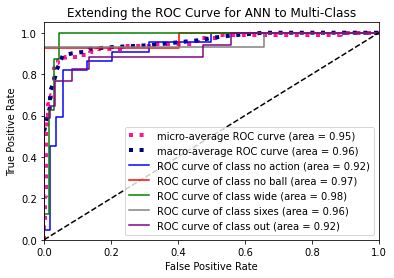

In [ ]:
plot_keras_multi_roc(test_y_one_hot, y_pred)

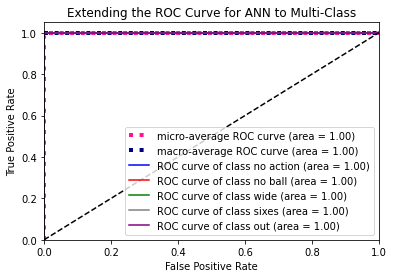

In [ ]:
train_y_one_hot = np.array(pd.get_dummies(train_y, columns=['0']))
y_pred_train = model3.predict(train_x)
plot_keras_multi_roc(train_y_one_hot, y_pred_train)